importing libraries

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas  as pd
import seaborn as sns

# Data Preprocessing 

Traing Image Preprocessing

In [23]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing

In [24]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [25]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [26]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 80.5   72.    78.5 ]
   [156.75 146.75 154.75]
   [159.   149.   157.  ]
   ...
   [151.75 144.75 152.75]
   [150.75 143.75 151.75]
   [150.   143.   151.  ]]

  [[ 79.5   71.25  77.5 ]
   [154.   144.   152.  ]
   [154.75 144.75 152.75]
   ...
   [150.5  143.5  151.5 ]
   [150.   143.   151.  ]
   [150.   143.   151.  ]]

  [[ 78.5   70.5   76.5 ]
   [153.25 143.25 151.25]
   [157.75 147.75 155.75]
   ...
   [151.   144.   152.  ]
   [151.5  144.5  152.5 ]
   [151.5  144.5  152.5 ]]

  ...

  [[ 58.    49.25  57.  ]
   [108.5   98.5  107.5 ]
   [115.   105.   114.  ]
   ...
   [136.75 128.75 139.75]
   [137.   129.   140.  ]
   [137.5  129.5  140.5 ]]

  [[ 57.75  49.75  56.75]
   [117.25 107.25 116.25]
   [116.75 106.75 115.75]
   ...
   [139.5  131.5  142.5 ]
   [136.   128.   139.  ]
   [136.   128.   139.  ]]

  [[ 62.    53.    61.  ]
   [117.75 107.75 116.75]
   [114.75 104.75 113.75]
   ...
   [146.5  138.5  149.5 ]
   [137.   129.   140.  ]
   [134.25 126.25 13

# Building Model

In [27]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()

In [29]:
#Building convulation Layer

In [30]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [31]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [33]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [34]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [35]:
model.add(Dropout(0.25))#to avoid overfiiting

In [36]:
model.add(Flatten())

In [37]:
model.add(Dense(units=1500,activation='relu'))

In [38]:
model.add(Dropout(0.4))

In [39]:
#output layer
model.add(Dense(units=38,activation='softmax'))

# Compiling Model

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 62, 62, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Training Model

In [42]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2674s 1s/step - accuracy: 0.4010 - loss: 2.1540 - val_accuracy: 0.8406 - val_loss: 0.5011
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2714s 1s/step - accuracy: 0.8340 - loss: 0.5237 - val_accuracy: 0.9028 - val_loss: 0.3075
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2657s 1s/step - accuracy: 0.8998 - loss: 0.3152 - val_accuracy: 0.9262 - val_loss: 0.2220
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2592s 1s/step - accuracy: 0.9339 - loss: 0.2030 - val_accuracy: 0.9334 - val_loss: 0.2177
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2776s 1s/step - accuracy: 0.9487 - loss: 0.1563 - val_accuracy: 0.9568 - val_loss: 0.1372
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2775s 1s/step - accuracy: 0.9617 - loss: 0.1158 - val_accuracy: 0.9536 - val_loss: 0.1528
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3202s 1s/step - accuracy: 0.9666 - loss: 0.1032 - val_accuracy: 0.9397 - val_loss: 0.2045
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3723s 2s/step - accuracy: 0.9711 -

# MODEL EVALUATION

In [43]:
#model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1374s 625ms/step - accuracy: 0.9918 - loss: 0.0246


In [61]:
print(train_loss,train_acc)

0.022185932844877243 0.9929440021514893


In [62]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 223s 406ms/step - accuracy: 0.9701 - loss: 0.0984


In [63]:
print(val_loss,val_acc)

0.10627499222755432 0.9685863852500916


# SAVING MODEL

In [64]:
model.save("trained_model.h5")

In [65]:
model.save("trained_model.keras")

In [66]:
training_history.history

{'accuracy': [0.6046660542488098,
  0.8599473834037781,
  0.911188542842865,
  0.9384593367576599,
  0.9531403183937073,
  0.9636673927307129,
  0.9690731763839722,
  0.9746496677398682,
  0.9793157577514648,
  0.9805676341056824],
 'loss': [1.3529146909713745,
  0.4415692389011383,
  0.2746204137802124,
  0.18692240118980408,
  0.1429082751274109,
  0.11108715832233429,
  0.09485334903001785,
  0.07922401279211044,
  0.06507672369480133,
  0.059132613241672516],
 'val_accuracy': [0.8405987024307251,
  0.9027999043464661,
  0.9261893630027771,
  0.9334167838096619,
  0.9568063020706177,
  0.9536194205284119,
  0.9396767616271973,
  0.958172082901001,
  0.9556680917739868,
  0.9685863852500916],
 'val_loss': [0.5011439323425293,
  0.30749091506004333,
  0.22198115289211273,
  0.21767863631248474,
  0.13718320429325104,
  0.15279336273670197,
  0.20454496145248413,
  0.12914058566093445,
  0.14865632355213165,
  0.10640008747577667]}

In [67]:
#recording history in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [68]:
training_history.history['accuracy']

[0.6046660542488098,
 0.8599473834037781,
 0.911188542842865,
 0.9384593367576599,
 0.9531403183937073,
 0.9636673927307129,
 0.9690731763839722,
 0.9746496677398682,
 0.9793157577514648,
 0.9805676341056824]

In [69]:
training_history.history['val_accuracy']

[0.8405987024307251,
 0.9027999043464661,
 0.9261893630027771,
 0.9334167838096619,
 0.9568063020706177,
 0.9536194205284119,
 0.9396767616271973,
 0.958172082901001,
 0.9556680917739868,
 0.9685863852500916]

# ACCURACY VISUALIZATION

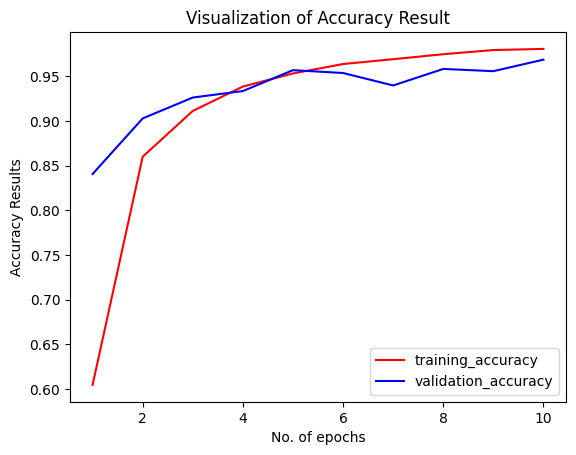

In [71]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='training_accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='validation_accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Results")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

# some other metrics for model evaluation

In [73]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [74]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [75]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 198s 359ms/step


(array([[9.9993527e-01, 5.3921161e-05, 6.4778028e-08, ..., 2.4641331e-12,
         1.1900579e-11, 4.9514767e-11],
        [9.9999869e-01, 9.6564565e-07, 4.5802566e-09, ..., 8.2453414e-15,
         8.2830861e-13, 4.2307721e-13],
        [1.0000000e+00, 1.6524450e-12, 3.8913447e-12, ..., 6.8958291e-21,
         1.7709179e-17, 3.5562678e-14],
        ...,
        [2.0278180e-11, 1.4107038e-12, 2.8161553e-09, ..., 1.7138064e-11,
         1.9331839e-10, 9.9999952e-01],
        [1.8076778e-11, 1.1520132e-13, 1.4902182e-10, ..., 3.4729972e-11,
         3.3112214e-11, 9.9999988e-01],
        [8.8474775e-18, 6.8369016e-19, 7.3959026e-17, ..., 1.3534297e-17,
         8.8008019e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [76]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [77]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [78]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [79]:
Y_true = tf.argmax(true_categories,axis=1)

In [82]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 539.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 1.5 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.6 MB 2.1 MB/s eta 0:00:06
   - -------------------------------------- 0.3/10.6 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.6 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/10.6 MB 5.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.7/10.6 MB 9.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.6/10.6 MB 11.1 MB/s eta 0:00:01
   ----


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip


In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.93      0.96       504
                                 Apple___Black_rot       0.98      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.97       440
                                   Apple___healthy       0.94      0.99      0.97       502
                               Blueberry___healthy       0.99      0.93      0.96       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.84      0.98      0.91       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.99      0.85      0.

In [85]:
cm = confusion_matrix(Y_true,predicted_categories)
cm,cm.shape

(array([[471,   7,   1, ...,   0,   1,   0],
        [  0, 494,   0, ...,   0,   0,   0],
        [  0,   0, 424, ...,   1,   1,   1],
        ...,
        [  0,   0,   0, ..., 486,   0,   0],
        [  0,   0,   0, ...,   0, 447,   0],
        [  2,   0,   1, ...,   0,   0, 475]], dtype=int64),
 (38, 38))

confusion matrix visualization

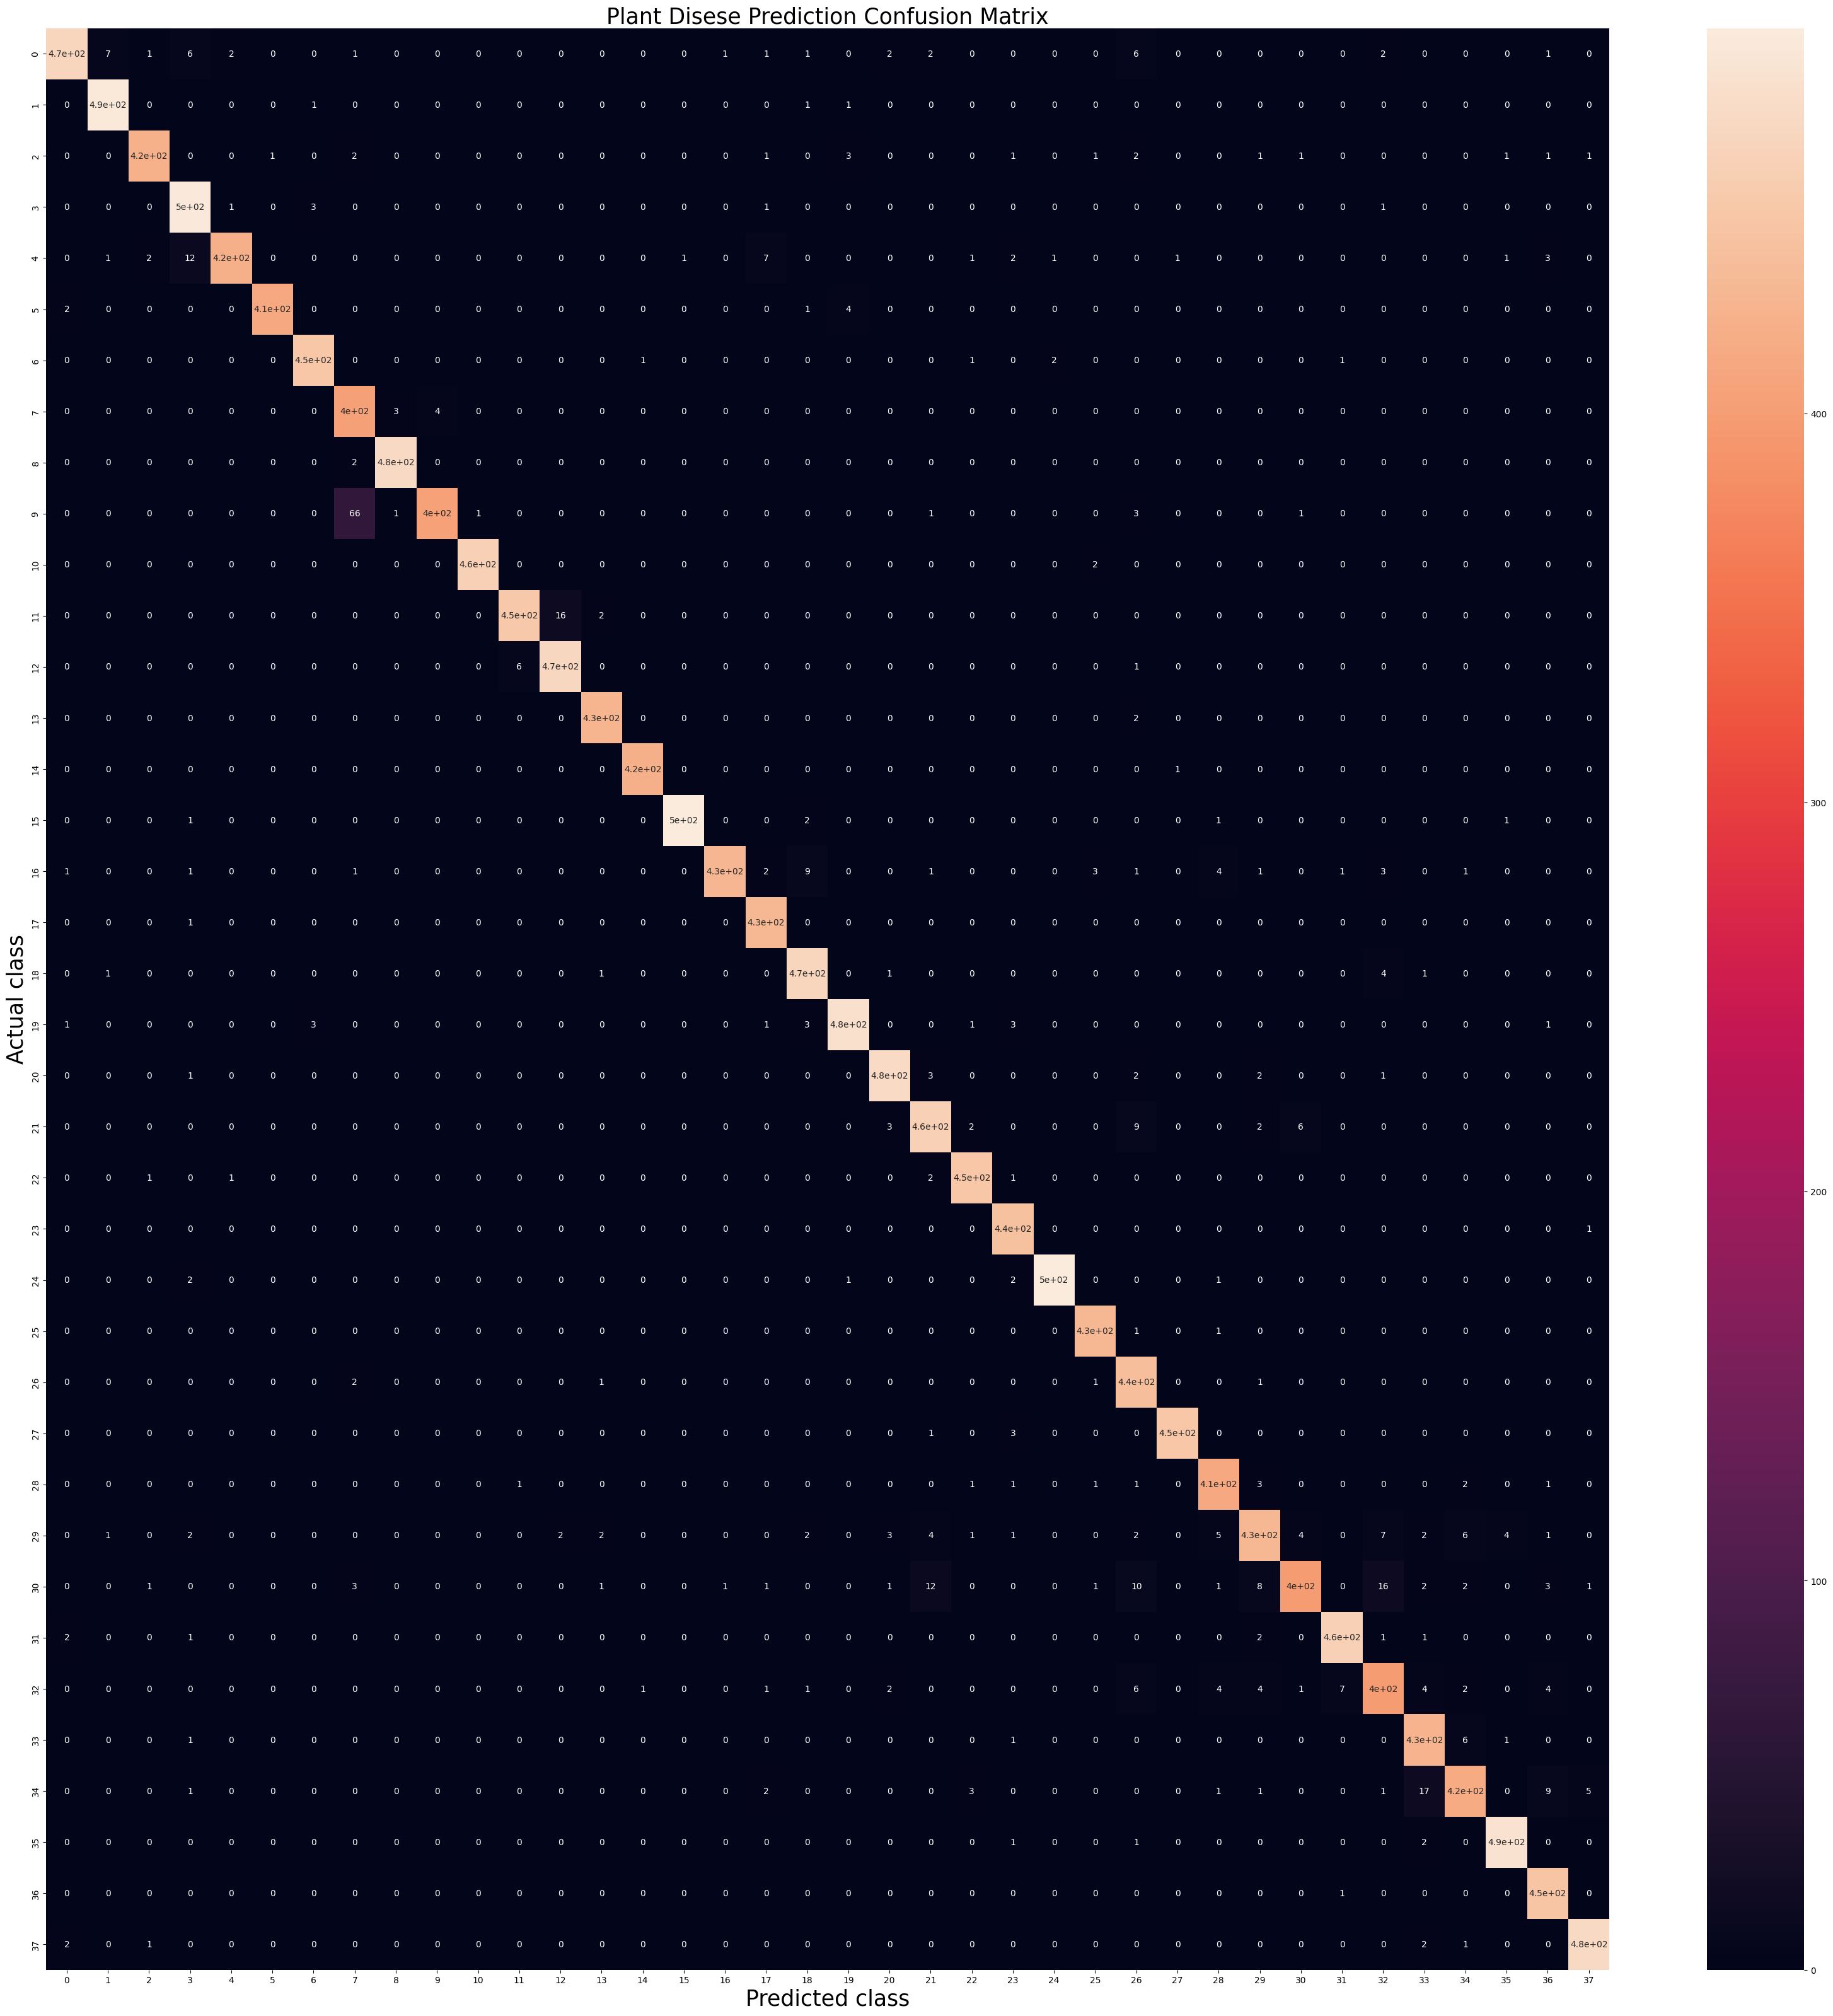

In [88]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws = {'size':10})
plt.xlabel("Predicted class",fontsize=25)
plt.ylabel("Actual class",fontsize=25)
plt.title("Plant Disese Prediction Confusion Matrix",fontsize=25)
plt.show()